# HomeWork Number One
## Stu. : Mahdi Mahdiani 4021334041
## Prof. : Dr. Shahsavar Haghighi
## TA : Mr. Saleh
### Spring 1403

## Import Libraries

In [1]:
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split

2024-04-02 02:02:07.994904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load Dataset

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Shape Of test and train

In [4]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


## Sample of Train 
### randomly i choose number 45

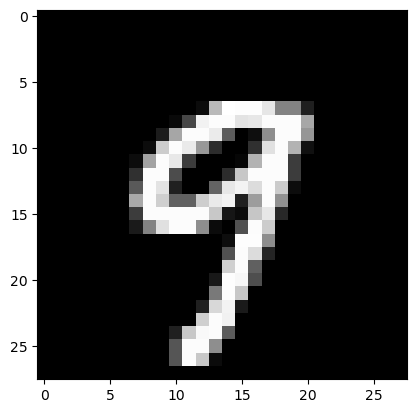

In [5]:
plt.imshow(x_train[45], cmap=pyplot.get_cmap('gray'))
plt.show()

## Sample of Test
### randomly i choose number 2316

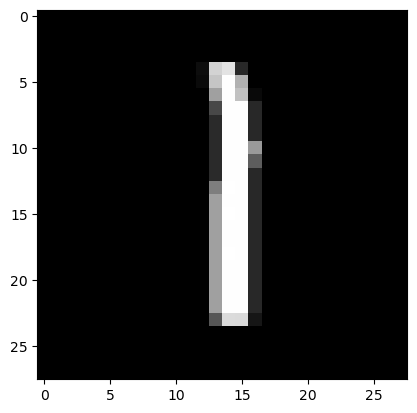

In [6]:
plt.imshow(x_test[2316], cmap=pyplot.get_cmap('gray'))
plt.show()

## Histogram of Training and Testing Data

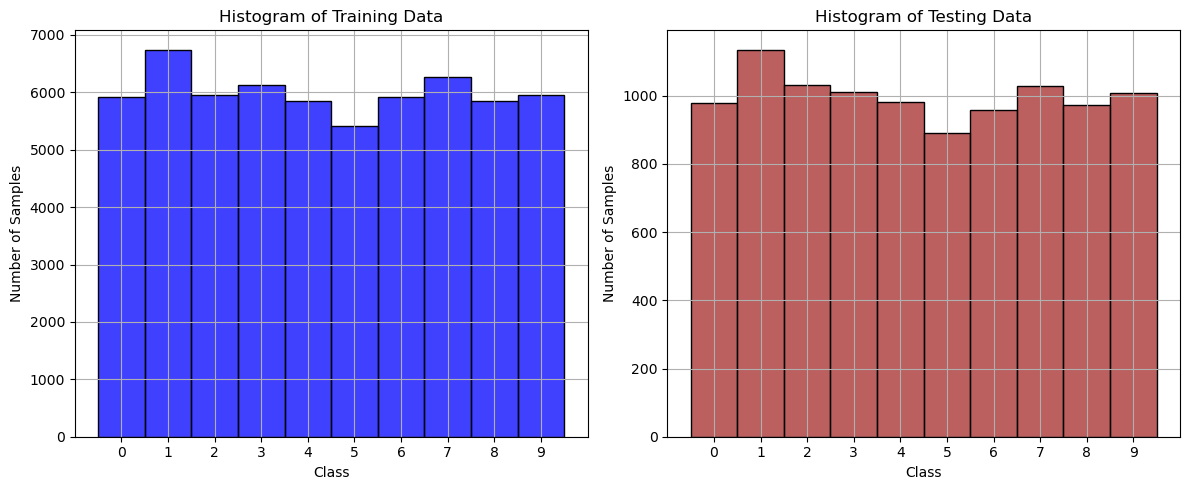

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=np.arange(11)-0.5, kde=False, color='blue')
plt.title('Histogram of Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(np.arange(10))
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=np.arange(11)-0.5, kde=False, color='brown')
plt.title('Histogram of Testing Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(np.arange(10))
plt.grid(True)

plt.tight_layout()
plt.show()

## Normailzation [0,1]

### before Normalization

In [8]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

### After Normalization

In [10]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## One Hot Encoding

### Before One Hot Encoding

In [11]:
y_train[2]

4

In [12]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

### After One Hot Encoding

In [13]:
y_train_one_hot[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

## Model 1

In [90]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,214 (410.99 KB)

 Trainable params: 105,214 (410.99 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train_one_hot,epochs=5,batch_size=200, validation_data=(x_test, y_test_one_hot))

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7895 - loss: 0.7211 - val_accuracy: 0.9422 - val_loss: 0.1964
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9491 - loss: 0.1718 - val_accuracy: 0.9617 - val_loss: 0.1371
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9666 - loss: 0.1169 - val_accuracy: 0.9681 - val_loss: 0.1079
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9747 - loss: 0.0857 - val_accuracy: 0.9718 - val_loss: 0.0941
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9786 - loss: 0.0697 - val_accuracy: 0.9720 - val_loss: 0.0914


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('\nTest accuracy:', test_acc ,'\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1034

Test accuracy: 0.972000002861023 
Test loss: 0.09130372107028961


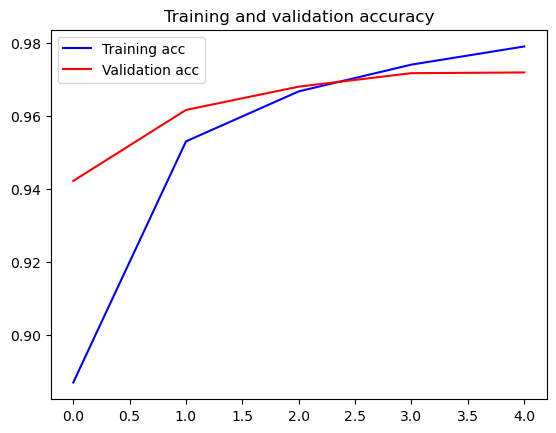

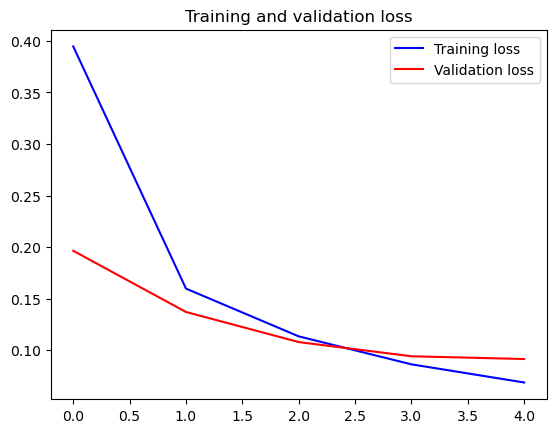

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
for epoch in range(5):
    accuracy = history.history['accuracy'][epoch]
    loss = history.history['loss'][epoch]
    print(f"accuracy in epoch {epoch + 1}: {accuracy:.4f}, loss in epoch {epoch + 1}: {loss:.4f}")

accuracy in epoch 1: 0.8868, loss in epoch 1: 0.3946
accuracy in epoch 2: 0.9531, loss in epoch 2: 0.1597
accuracy in epoch 3: 0.9668, loss in epoch 3: 0.1134
accuracy in epoch 4: 0.9742, loss in epoch 4: 0.0863
accuracy in epoch 5: 0.9791, loss in epoch 5: 0.0687


### Using Recall Metric

In [32]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['recall'])

In [33]:
history = model.fit(x_train, y_train_one_hot,epochs=5,batch_size=200, validation_data=(x_test, y_test_one_hot))

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0592 - recall: 0.9797 - val_loss: 0.0874 - val_recall: 0.9706
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0465 - recall: 0.9834 - val_loss: 0.0844 - val_recall: 0.9716
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0377 - recall: 0.9872 - val_loss: 0.0770 - val_recall: 0.9748
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0298 - recall: 0.9898 - val_loss: 0.0776 - val_recall: 0.9753
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0237 - recall: 0.9926 - val_loss: 0.0696 - val_recall: 0.9782


In [34]:
test_loss, test_rec = model.evaluate(x_test, y_test_one_hot)
print('\nTest rec:', test_rec ,'\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0808 - recall: 0.9749

Test rec: 0.9782000184059143 
Test loss: 0.06947940587997437


### Using F1-Score Metric

In [35]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['f1_score'])

In [36]:
history = model.fit(x_train, y_train_one_hot,epochs=5,batch_size=200, validation_data=(x_test, y_test_one_hot))

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.9933 - loss: 0.0221 - val_f1_score: 0.9788 - val_loss: 0.0775
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.9939 - loss: 0.0200 - val_f1_score: 0.9772 - val_loss: 0.0790
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.9959 - loss: 0.0134 - val_f1_score: 0.9784 - val_loss: 0.0802
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.9966 - loss: 0.0120 - val_f1_score: 0.9776 - val_loss: 0.0844
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.9975 - loss: 0.0094 - val_f1_score: 0.9778 - val_loss: 0.0828


In [37]:
test_loss, test_f1 = model.evaluate(x_test, y_test_one_hot)
print('\nTest f1:', test_f1 ,'\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.9741 - loss: 0.0929

Test f1: tf.Tensor(
[0.9842559  0.98898184 0.9761324  0.9726295  0.98076916 0.9797069
 0.9817422  0.97620195 0.96807414 0.96942353], shape=(10,), dtype=float32) 
Test loss: 0.08270911127328873


In [38]:
f1_scores = np.array([0.9842559, 0.98898184, 0.9761324, 0.9726295, 0.98076916, 0.9797069,
                      0.9817422, 0.97620195, 0.96807414, 0.96942353])

In [40]:
average_f1 = np.mean(f1_scores)
print(average_f1)

0.9777917520000001


### Using RMSprop Optimizer

In [48]:
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
history_n = model.fit(x_train, y_train_one_hot,epochs=5,batch_size=200, validation_data=(x_test, y_test_one_hot))

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8339 - loss: 0.6053 - val_accuracy: 0.9444 - val_loss: 0.1873
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9513 - loss: 0.1638 - val_accuracy: 0.9610 - val_loss: 0.1249
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9667 - loss: 0.1130 - val_accuracy: 0.9669 - val_loss: 0.1018
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9747 - loss: 0.0835 - val_accuracy: 0.9743 - val_loss: 0.0849
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9802 - loss: 0.0663 - val_accuracy: 0.9747 - val_loss: 0.0834


In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('\nTest accuracy:', test_acc ,'\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.0964

Test accuracy: 0.9746999740600586 
Test loss: 0.08329248428344727


In [59]:
for epoch in range(5):
    accuracy = history_n.history['accuracy'][epoch]
    loss = history_n.history['loss'][epoch]
    print(f"accuracy in epoch {epoch + 1}: {accuracy:.4f}, loss in epoch {epoch + 1}: {loss:.4f}")

accuracy in epoch 1: 0.9013, loss in epoch 1: 0.3520
accuracy in epoch 2: 0.9552, loss in epoch 2: 0.1516
accuracy in epoch 3: 0.9686, loss in epoch 3: 0.1068
accuracy in epoch 4: 0.9750, loss in epoch 4: 0.0820
accuracy in epoch 5: 0.9802, loss in epoch 5: 0.0653


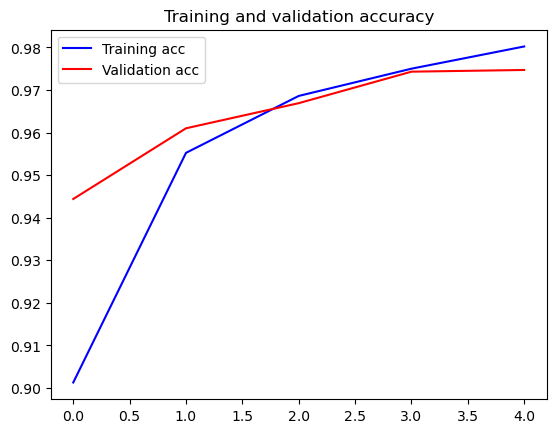

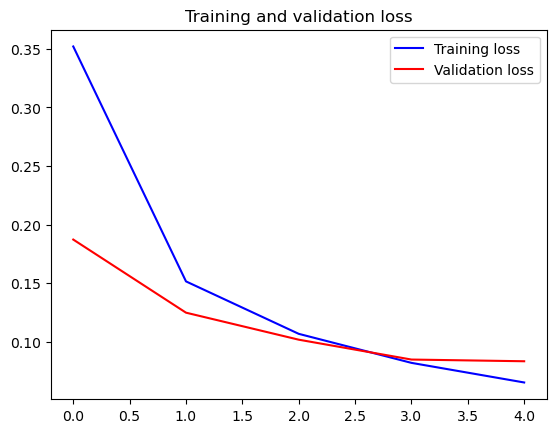

In [56]:
acc = history_n.history['accuracy']
val_acc = history_n.history['val_accuracy']
loss = history_n.history['loss']
val_loss = history_n.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Using Stochastic Gradient Descent 

In [64]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
history = model.fit(x_train, y_train_one_hot,epochs=5,batch_size=200, validation_data=(x_test, y_test_one_hot))

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4118 - loss: 1.9510 - val_accuracy: 0.8178 - val_loss: 0.8785
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8287 - loss: 0.7650 - val_accuracy: 0.8727 - val_loss: 0.5160
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8697 - loss: 0.5117 - val_accuracy: 0.8886 - val_loss: 0.4178
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8841 - loss: 0.4249 - val_accuracy: 0.8985 - val_loss: 0.3714
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8974 - loss: 0.3774 - val_accuracy: 0.9056 - val_loss: 0.3441


In [66]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('\nTest accuracy:', test_acc ,'\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8926 - loss: 0.3950

Test accuracy: 0.9056000113487244 
Test loss: 0.3439224660396576


In [67]:
for epoch in range(5):
    accuracy = history.history['accuracy'][epoch]
    loss = history.history['loss'][epoch]
    print(f"accuracy in epoch {epoch + 1}: {accuracy:.4f}, loss in epoch {epoch + 1}: {loss:.4f}")

accuracy in epoch 1: 0.6107, loss in epoch 1: 1.5621
accuracy in epoch 2: 0.8432, loss in epoch 2: 0.6715
accuracy in epoch 3: 0.8745, loss in epoch 3: 0.4807
accuracy in epoch 4: 0.8879, loss in epoch 4: 0.4117
accuracy in epoch 5: 0.8964, loss in epoch 5: 0.3740


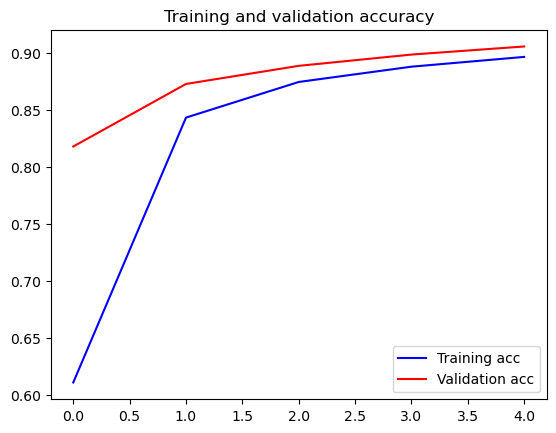

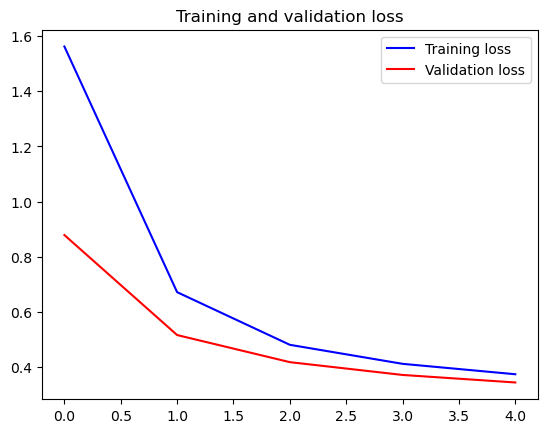

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Changing Learning rate

In [91]:
learning_rate = 0.5

sgd_optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
history = model.fit(x_train, y_train_one_hot,epochs=5,batch_size=200, validation_data=(x_test, y_test_one_hot))

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7742 - loss: 0.7124 - val_accuracy: 0.9552 - val_loss: 0.1531
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9582 - loss: 0.1379 - val_accuracy: 0.9710 - val_loss: 0.0964
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9705 - loss: 0.0978 - val_accuracy: 0.9723 - val_loss: 0.0898
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9788 - loss: 0.0690 - val_accuracy: 0.9739 - val_loss: 0.0864
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9831 - loss: 0.0566 - val_accuracy: 0.9769 - val_loss: 0.0742


In [93]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('\nTest accuracy:', test_acc ,'\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0903

Test accuracy: 0.9768999814987183 
Test loss: 0.0740339607000351


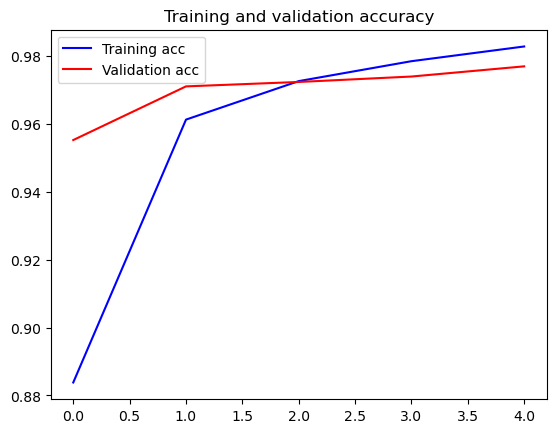

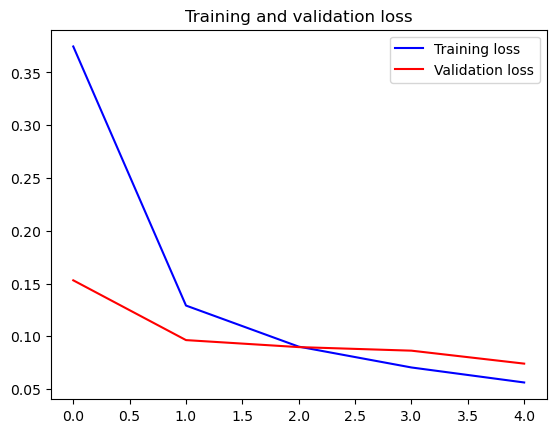

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 2

In [95]:
model_2 = Sequential()
model_2.add(layers.Flatten(input_shape=(28, 28)))
model_2.add(Dense(120, activation='relu'))
model_2.add(Dense(84, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

In [96]:
model_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,214 (410.99 KB)

 Trainable params: 105,214 (410.99 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model_2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
history_2 = model_2.fit(x_train, y_train_one_hot,epochs=10,batch_size=200, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7997 - loss: 0.7268 - val_accuracy: 0.9485 - val_loss: 0.1782
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9549 - loss: 0.1577 - val_accuracy: 0.9602 - val_loss: 0.1312
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9696 - loss: 0.1050 - val_accuracy: 0.9668 - val_loss: 0.1065
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9765 - loss: 0.0809 - val_accuracy: 0.9723 - val_loss: 0.0907
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9805 - loss: 0.0647 - val_accuracy: 0.9745 - val_loss: 0.0846
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9856 - loss: 0.0488 - val_accuracy: 0.9745 - val_loss: 0.0808
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9881 - loss: 0.0410 - val_accuracy: 0.9749 - val_loss: 0.0792
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9901 - loss: 0.0348 - val_accuracy: 0.

In [99]:
test_loss, test_acc = model_2.evaluate(x_test, y_test_one_hot)
print('\nTest accuracy:', test_acc ,'\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0835

Test accuracy: 0.9782999753952026 
Test loss: 0.06985071301460266


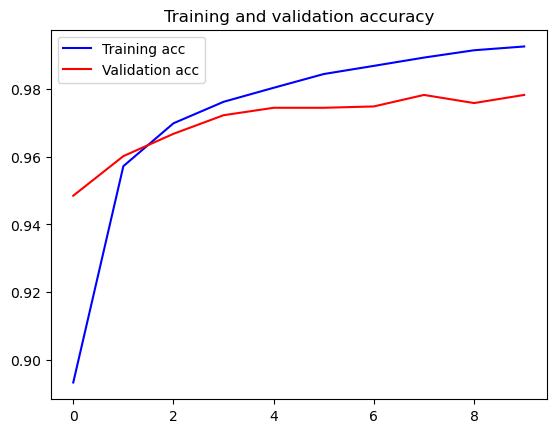

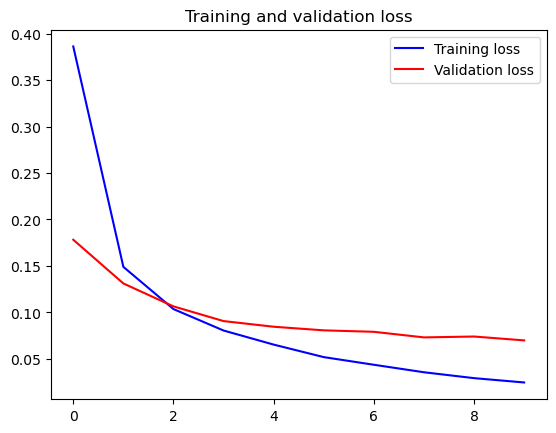

In [100]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 3

In [126]:
model_3 = Sequential()
model_3.add(layers.Flatten(input_shape=(28, 28)))
model_3.add(Dense(120, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(84, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(10, activation='softmax'))

In [102]:
model_3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,214 (410.99 KB)

 Trainable params: 105,214 (410.99 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model_3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [128]:
history_3 = model_3.fit(x_train, y_train_one_hot,epochs=10,batch_size=200, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7185 - loss: 0.9042 - val_accuracy: 0.9392 - val_loss: 0.1938
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9329 - loss: 0.2311 - val_accuracy: 0.9586 - val_loss: 0.1306
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9508 - loss: 0.1695 - val_accuracy: 0.9657 - val_loss: 0.1122
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9606 - loss: 0.1343 - val_accuracy: 0.9689 - val_loss: 0.0977
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9643 - loss: 0.1177 - val_accuracy: 0.9729 - val_loss: 0.0871
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9688 - loss: 0.1022 - val_accuracy: 0.9740 - val_loss: 0.0832
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9721 - loss: 0.0903 - val_accuracy: 0.9760 - val_loss: 0.0789
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9748 - loss: 0.0793 - val_accuracy: 0.

In [129]:
test_loss, test_acc = model_3.evaluate(x_test, y_test_one_hot)
print('\nTest accuracy:', test_acc ,'\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0872

Test accuracy: 0.9782999753952026 
Test loss: 0.0730796530842781


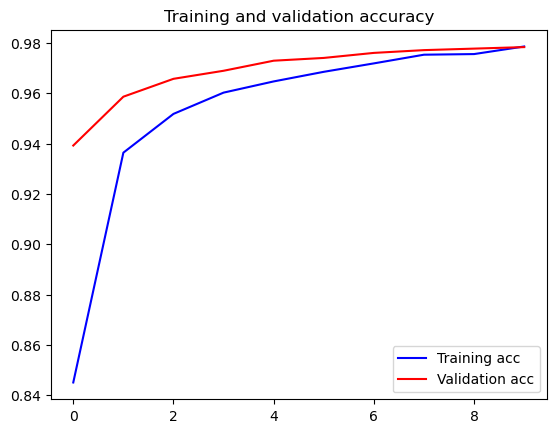

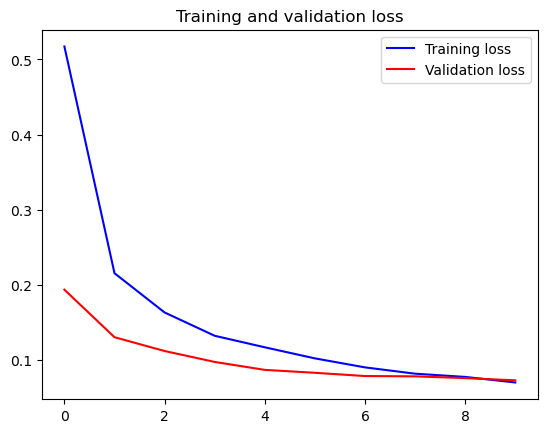

In [130]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 4

In [144]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784)  
x_test = x_test.reshape(-1, 784)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [145]:
model_4 = Sequential()
model_4.add(Flatten(input_shape=(784,)))
model_4.add(Dense(120, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(84, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(10, activation='softmax'))

In [139]:
model_4.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,214 (410.99 KB)

 Trainable params: 105,214 (410.99 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
model_4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [147]:
history = model_4.fit(x_train, y_train,epochs=10,batch_size=200, validation_data=(x_val, y_val))

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7207 - loss: 0.9126 - val_accuracy: 0.9458 - val_loss: 0.1915
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9288 - loss: 0.2403 - val_accuracy: 0.9585 - val_loss: 0.1359
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9477 - loss: 0.1761 - val_accuracy: 0.9645 - val_loss: 0.1129
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9578 - loss: 0.1412 - val_accuracy: 0.9693 - val_loss: 0.1011
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9634 - loss: 0.1210 - val_accuracy: 0.9733 - val_loss: 0.0891
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9671 - loss: 0.1057 - val_accuracy: 0.9737 - val_loss: 0.0816
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9711 - loss: 0.0895 - val_accuracy: 0.9740 - val_loss: 0.0773
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9750 - loss: 0.0818 - val_accuracy: 0.

In [148]:
test_loss, test_acc = model_4.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc ,'\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0924

Test accuracy: 0.9767000079154968 
Test loss: 0.07637829333543777


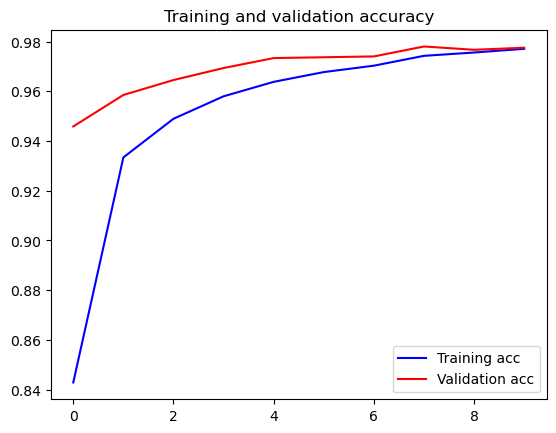

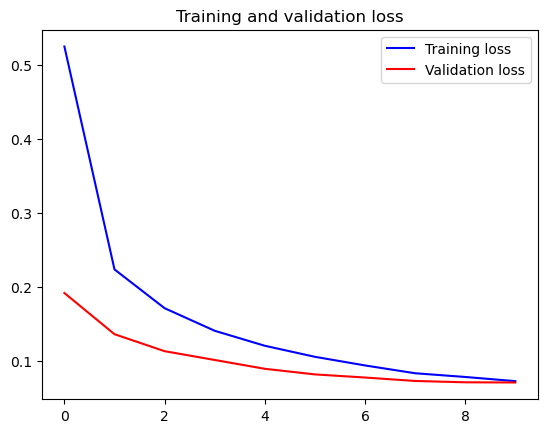

In [149]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Thank You 